![title](img/title_2.png)

### > Introducing Quantum Information Science Kit (qiskit)
### > Quantum Circuits I
### > Quantum Circuits II
### > Transpilation

### * Another important element that will not be covered: Noisy quantum computing

![part1](img/part1_v2.png)

## This Jupyter notebook is available at https://github.com/dkp-quantum/Tutorial

## Further Information

#### * Qiskit tutorial: https://nbviewer.jupyter.org/github/Qiskit/qiskit-tutorials/blob/master/qiskit/1_start_here.ipynb

#### * Qiskit online textbook: https://community.qiskit.org/textbook/

#### * Qiskit documentation: https://qiskit.org/documentation/

#### * Qiskit GitHub: https://github.com/Qiskit

![figure1](img/qiskit_front.png)

![hardware](img/hardware_v2.png)

![qiskit](img/qiskit.png)

![qiskit](img/workflow.png)

## Qiskit Programming at IBM Quantum Experience: https://quantum-computing.ibm.com/

# To run it on your computer:
## Download & Install Anaconda (Python 3.7) from http://www.anaconda.com/distribution
![figure2](img/anaconda.png)

## <font color = black>For a new qiskit installation:</font>
pip install qiskit

## <font color = black>For an update:</font>
pip install -U qiskit

### Updating to the new IBM Q Experience

Since July 2019 (and with version 0.3 of this qiskit-ibmq-provider package), the IBMQProvider defaults to using the new __IBM Q Experience__, which supersedes the legacy Quantum Experience and Qconsole. The new __IBM Q Experience__ is also referred as v2, whereas the legacy one and Qconsole as v1.

If you have credentials for the legacy Quantum Experience or Qconsole stored in disk, you can make use of IBMQ.update_account() helper. This helper will read your current credentials stored in disk and attempt to convert them:

In [ ]:
# If you already have saved IBM credentials with previous version, 
# update your credentials that is stored in disk
IBMQ.update_account()

In [1]:
# import
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram, plot_state_city, plot_state_paulivec
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
from qiskit.tools.monitor import backend_overview, backend_monitor, job_monitor

In [6]:
# Create a quantum register with 3 qubits
q = QuantumRegister(3,'q')
# Form a quantum circuit
# Note that the circuit name is optional
qc = QuantumCircuit(q,name="first_qc")
# Display the quantum circuit
qc.draw()

In [12]:
# Create a classical register with 3 bits
c = ClassicalRegister(3,'c')

meas = QuantumCircuit(q,c,name="first_m")
meas.barrier(q)
meas.measure(q[0], c[0])
meas.measure(q[1], c[1])
meas.measure(q[2], c[2])
#meas.measure(q[3], c[3])
#meas.measure(q[4], c[4])
meas.draw()

In [14]:
# Add a x gate on qubit 0.
qc.x(0)
# Add a Hadamard gate on qubit 1, putting this in superposition.
qc.h(1)
# Add a CX (CNOT) gate on control qubit 1 
# and target qubit 2 to create an entangled state.
qc.cx(1, 2)
qc.draw()

In [15]:
# Quantum circuits can be added with + operations
# Add two pre-defined circuits
qc_comp=qc+meas
qc_comp.draw()

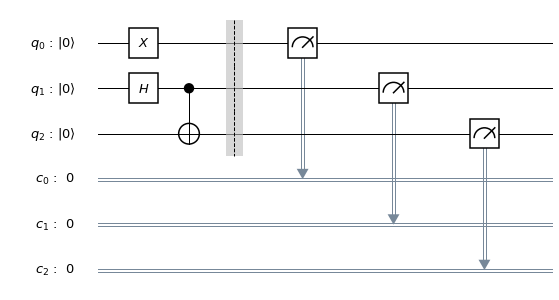

In [20]:
# Draw the quantum circuit in a different (slightly better) format
qc_comp.draw(output='mpl')

## Current qiskit release includes three simulator backends

1. __QASM Simulator__: It emulates execution of a quantum circuits on a real device and returns __measurement counts__. It includes highly configurable noise models and can even be loaded with automatically generated approximate noise models based on the calibration parameters of actual hardware devices.

    * What is __QASM__? QASM = Quantum Assembly Language (see https://arxiv.org/abs/1707.03429 for more detail)
<br>
    
</br>

2. __Statevector Simulator__: It simulates the ideal execution of a quantum circuit and returns __the final quantum state vector__ of the device at the end of simulation.

3. __Unitary Simulator__: It allows simulation of the final unitary matrix implemented by an ideal quantum circuit. This only works if all the elements in the circuit are unitary operations.

In [43]:
# Use Aer's qasm_simulator
backend_q = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is default.
job_sim1 = execute(qc_comp, backend_q, shots=1024)

In [44]:
job_sim1.status()

<JobStatus.DONE: 'job has successfully run'>

In [45]:
# Grab the results from the job.
result_sim1 = job_sim1.result()
result_sim1

Result(backend_name='qasm_simulator', backend_version='0.2.3', date=datetime.datetime(2019, 8, 29, 15, 13, 57, 424990), header=Obj(backend_name='qasm_simulator', backend_version='0.2.3'), job_id='87ae7f94-1843-4d3d-9ca0-d338a9e73812', metadata={'max_memory_mb': 4096, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.0026519900000000003}, qobj_id='1731940e-34c1-4896-99f3-4fc74e80f1e5', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x1=519, 0x7=505)), header=Obj(clbit_labels=[['c', 0], ['c', 1], ['c', 2]], creg_sizes=[['c', 3]], memory_slots=3, n_qubits=3, name='circuit8', qreg_sizes=[['q', 3]], qubit_labels=[['q', 0], ['q', 1], ['q', 2]]), meas_level=2, metadata={'method': 'stabilizer', 'parallel_shots': 8, 'parallel_state_update': 1}, seed_simulator=1399065915, shots=1024, status='DONE', success=True, time_taken=0.002554171)], status='COMPLETED', success=True, time_taken=0.00561213493347168)

In [46]:
result_sim1.get_counts(qc_comp)

{'111': 505, '001': 519}

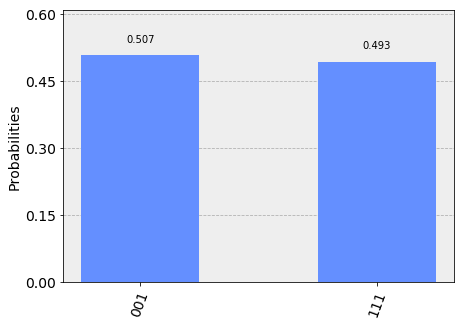

In [47]:
plot_histogram(result_sim1.get_counts(qc_comp))

In [49]:
# Use Aer's statevector_simulator
backend_sv = Aer.get_backend('statevector_simulator')

# Execute the circuit on the statevector simulator.
job_sim2 = execute(qc, backend_sv)

In [50]:
# Grab the results from the job.
result_sim2 = job_sim2.result()
# Output the entire result
job_sim2.result()

Result(backend_name='statevector_simulator', backend_version='0.2.3', date=datetime.datetime(2019, 8, 29, 15, 22, 39, 205748), header=Obj(backend_name='statevector_simulator', backend_version='0.2.3'), job_id='c95e8573-81a5-4434-a275-d8b2e0174768', metadata={'max_memory_mb': 4096, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.000932304}, qobj_id='0dbfdfc9-1c3d-433e-a0ef-2e666f2a5887', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=1), statevector=[0j, 0j, (1+0j), 0j]), header=Obj(clbit_labels=[['cont', 0]], creg_sizes=[['cont', 1]], memory_slots=1, n_qubits=2, name='circuit14', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), meas_level=2, metadata={'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=1819276787, shots=1, status='DONE', success=True, time_taken=0.000401456)], status='COMPLETED', success=True, time_taken=0.004684925079345703)

In [51]:
# See output state as a vector
outputstate = result_sim2.get_statevector(qc, decimals=5)
print(outputstate)

[0.+0.j 0.+0.j 1.+0.j 0.+0.j]


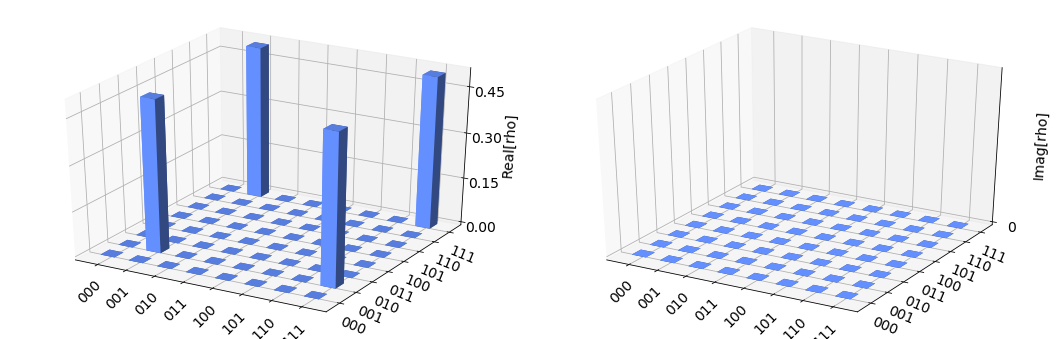

In [564]:
# Visualize density matrix
plot_state_city(outputstate)

In [579]:
# Examine state fidelity, compare with a basis state |111>
sf1=state_fidelity(basis_state('111', 3), outputstate)
# Examine state fidelity w.r.t the desired state
desired_state=[0,1,0,0,0,0,0,1]/np.sqrt(2)
sf2=state_fidelity(desired_state, outputstate)
print(sf1)
print(sf2)

0.5000045521
1.0000091041999999


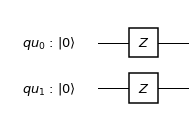

In [601]:
# Create a simple quantum register with 2 qubit 
# to examine unitary simulator
qu2 = QuantumRegister(2,'qu')
# Form a quantum circuit
# Note that the circuit name is optional
qu = QuantumCircuit(qu2,name="unitary_qc")
# Add a single qubit rotation
qu.z(0)
qu.z(1)
# Display the quantum circuit
qu.draw(output='mpl')

In [445]:
# Use Aer's unitary_simulator
backend_u = Aer.get_backend('unitary_simulator')

# Execute the circuit on the unitary simulator.
job_usim = execute(qu, backend_u)

In [602]:
# Grab the results from the job.
result_usim = job_usim.result()
result_usim

Result(backend_name='unitary_simulator', backend_version='0.2.3', date=datetime.datetime(2019, 8, 20, 10, 42, 11, 218490), header=Obj(backend_name='unitary_simulator', backend_version='0.2.3'), job_id='67313f24-c87c-44ed-8fda-04531c4e2026', metadata={'max_memory_mb': 4096, 'omp_enabled': True, 'parallel_experiments': 1, 'time_taken': 0.001464012}, qobj_id='24092f17-3eb4-433a-8511-22b137962ba6', results=[ExperimentResult(data=ExperimentResultData(unitary=[[(1+0j), 0j, 0j, 0j], [0j, (-1+0j), 0j, 0j], [0j, 0j, (-1+0j), 0j], [0j, 0j, 0j, (1+0j)]]), header=Obj(clbit_labels=[], creg_sizes=[], memory_slots=0, n_qubits=2, name='unitary_qc', qreg_sizes=[['qu', 2]], qubit_labels=[['qu', 0], ['qu', 1]]), meas_level=2, metadata={'parallel_shots': 1, 'parallel_state_update': 8}, seed_simulator=3166291926, shots=1, status='DONE', success=True, time_taken=0.0006031610000000001)], status='COMPLETED', success=True, time_taken=0.005246877670288086)

In [607]:
# Output the unitary matrix
unitary = result_usim.get_unitary(qu)
print('%s\n' % unitary)
# Check process fidelity
pf1=process_fidelity(Pauli(label='IX').to_matrix(), unitary)
pf2=process_fidelity(Pauli(label='ZZ').to_matrix(), unitary)
print('%s\n' % pf1)
print('%s\n' % pf2)

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]

0j

(1+0j)



# How to estimate an expectation value of an observable?

In [608]:
# Measure an expectation value of a Pauli observable
Z = np.array([[1, 0], [0, -1]])
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
ZZ=np.kron(Z,Z)
XX=np.kron(X,X)

# Or use qiskit's built-in function to define Pauli matrices
ZI = Pauli(label='ZI').to_matrix()
XI = Pauli(label='XI').to_matrix()
YI = Pauli(label='YI').to_matrix()

In [609]:
# Create some functions for measuring expectation values
# For pure states
def expectation_state(state, Operator):
    return np.dot(state.conj(), np.dot(Operator, state))
# For density matrices
def expectation_density(density, Operator):
    return np.trace(Operator @ density)

# Running Quantum Circuits on IBM Q

## Retrieve IBM Quantum Device Information

In [19]:
IBMQ.enable_account('YOUR_TOKERN')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
print(IBMQ.stored_account())
print(IBMQ.active_account())

In [21]:
my_provider=IBMQ.get_provider()
my_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx4') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [22]:
# Retrieve IBM Quantum device information
backend_overview()

/anaconda3/lib/python3.6/site-packages/qiskit/providers/ibmq/ibmqfactory.py:547: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


ibmq_ourense                 ibmq_16_melbourne            ibmqx4
------------                 -----------------            ------
Num. Qubits:  5              Num. Qubits:  14             Num. Qubits:  5
Pending Jobs: 5              Pending Jobs: 23             Pending Jobs: 9
Least busy:   True           Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  False
Avg. T1:      100.4          Avg. T1:      51.9           Avg. T1:      44.0
Avg. T2:      55.2           Avg. T2:      70.3           Avg. T2:      19.0



ibmqx2
------
Num. Qubits:  5
Pending Jobs: 30
Least busy:   False
Operational:  False
Avg. T1:      51.7
Avg. T2:      45.6





In [27]:
# Retrieve a specific IBM Quantum device information
# ibmq_16_melbourne as an example
backend_mel = my_provider.get_backend('ibmq_16_melbourne')
backend_monitor(backend_mel)

ibmq_16_melbourne
Configuration
-------------
    n_qubits: 14
    operational: True
    status_msg: active
    pending_jobs: 23
    backend_version: 1.0.0
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    credits_required: True
    max_experiments: 150
    description: 14 qubit device
    coupling_map: [[1, 0], [1, 2], [2, 3], [4, 3], [4, 10], [5, 4], [5, 6], [5, 9], [6, 8], [7, 8], [9, 8], [9, 10], [11, 3], [11, 10], [11, 12], [12, 2], [13, 1], [13, 12]]
    allow_q_circuit: False
    online_date: 2018-11-06T05:00:00+00:00
    n_registers: 1
    sample_name: albatross
    allow_q_object: True
    memory: False
    max_shots: 8192
    conditional: False
    url: None
    open_pulse: False
    backend_name: ibmq_16_melbourne

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 5.10014 GHz / 42.14383 µs / 21.19826 µs / 0.0 / 0.00288 / 0.00575 / 0.0

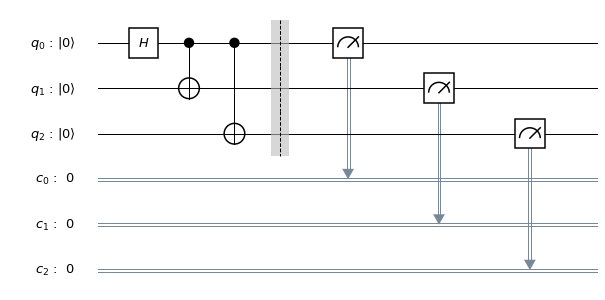

In [616]:
# Create a 3-qubit GHZ state
ghz3 = QuantumRegister(3,'q')
qc= QuantumCircuit(ghz3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)

qghz3=qc+meas
qghz3.draw(output='mpl')

## Now, let's run circuits with real IBMQ devices

In [26]:
# Define backend as one of the real devices (5-qubit systems for now)
backend_qx2 = my_provider.get_backend('ibmqx2')
backend_qx4 = my_provider.get_backend('ibmqx4')
# There is a new 5-qubit backend
backend_ou = my_provider.get_backend('ibmq_ourense')

In [624]:
# Run 3-qubit GHZ experiment on a 5-qubit device (try ourense)
job_exp = execute(qghz3, backend=backend_ou)
job_monitor(job_exp)

Job Status: job has successfully run


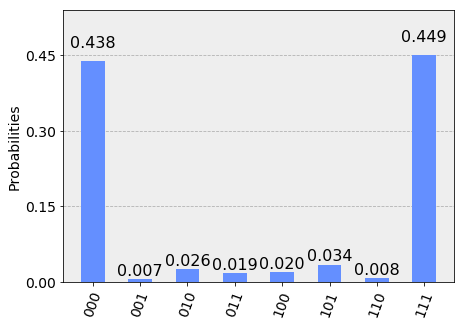

In [636]:
# Grab experimental results
result_ou = job_exp.result()
counts_ou = result_exp.get_counts(qghz3)
plot_histogram(counts_ou)

In [ ]:
# Run the same experiment on the other 5-qubit device as well.
job_exp2 = execute(qghz3, backend=backend_qx4)
job_monitor(job_exp2)

In [ ]:
# Grab experimental results
result_exp2 = job_exp2.result()
counts_exp2 = result_exp2.get_counts(qghz3)

In [633]:
# Finally, run the same experiment on the 14-qubit device.
job_exp3 = execute(qghz3, backend=backend_mel)
job_monitor(job_exp3)

Job Status: job has successfully run


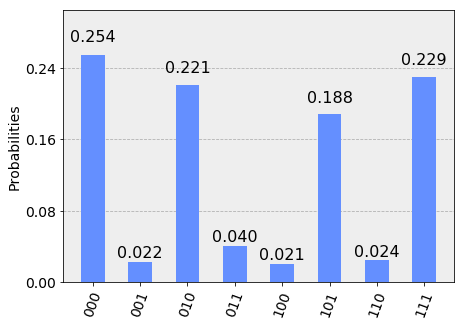

In [637]:
# Grab experimental results
result_mel = job_exp3.result()
counts_mel = result_mel.get_counts(qghz3)
plot_histogram(counts_mel)

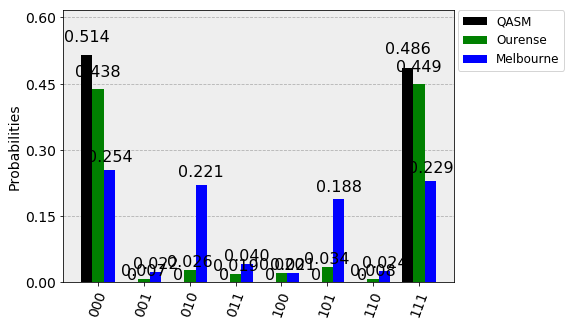

In [645]:
# Now, compare to theory by running it on qasm_simulator
job_qasm = execute(qghz3,backend=backend_q)
result_qasm = job_qasm.result()
counts_qasm = result_qasm.get_counts(qghz3)
# Plot both experimental and ideal results
plot_histogram([counts_qasm,counts_ou,counts_mel],
               color=['black','green','blue'],
               legend=['QASM','Ourense','Melbourne'])

![part2](img/part2_v2.png)

### > Introducing Quantum Information Science Kit (qiskit)
### > Quantum Circuits I
### > Quantum Circuits II
### > Transpilation

# Qiskit gates summary: 
## <a href="https://quantum-computing.ibm.com/jupyter/tutorial/fundamentals/7_summary_of_quantum_operations.ipynb" target="_blank"> https://quantum-computing.ibm.com/jupyter/tutorial/fundamentals/7_summary_of_quantum_operations.ipynb</a>

# Native gates of IBM Q devices

One way to write a general form of a single qubit unitary:
<br>
<br>
$$
U(\theta,\phi,\lambda)=\begin{bmatrix} 
 \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i(\lambda+\phi)}\cos(\theta/2) 
\end{bmatrix}
$$
***
Native single qubit gates:
* `u3`=$U(\theta,\phi,\lambda)$
* `u2`=$U(\pi/2,\phi,\lambda)$
* `u1`=$U(0,0,\lambda)$

Native two qubit gate:
* controlled-NOT

### But why such form? $\rightarrow$ This is related to gate implementations on real devices

### Note that $$
U(\theta,\phi,\lambda)=\begin{bmatrix} 
 \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i(\lambda+\phi)}\cos(\theta/2) 
\end{bmatrix}
$$ 
### can be written as:
### \begin{align}
U(\theta,\phi,\lambda)&=R_z(\phi)R_y(\theta)R_z(\lambda)\\
&=R_z(\phi)R_x(-\pi/2)R_z(\theta)R_x(\pi/2)R_z(\lambda)
\end{align}

### In RF/MW based quantum control, $R_z$ is given for free, and $R_x(\pm\pi/2)$ can be calibrated with high precision.

# Customize initial state

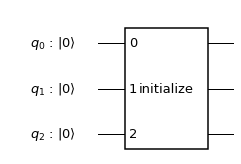

In [30]:
# Create a quantum register with 3 qubits
q = QuantumRegister(3,'q')
# Form a quantum circuit
qent = QuantumCircuit(q)
qent.initialize([1, 0, 0, 0, 0, 0, 0, 1] / np.sqrt(2), [q[0], q[1], q[2]])
# Display the quantum circuit
qent.draw(output='mpl')

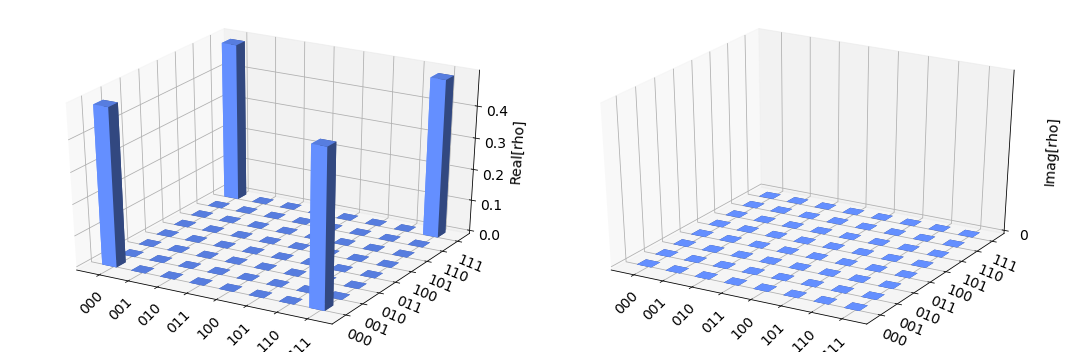

In [31]:
# Use Aer's state vector simulator
backend_sv = Aer.get_backend('statevector_simulator')

# Execute and plot output state
output_ent = execute(qent, backend_sv).result().get_statevector(0, decimals=3)
plot_state_city(output_ent)

## Build a sub-circuit as a sub-routine in many circuits

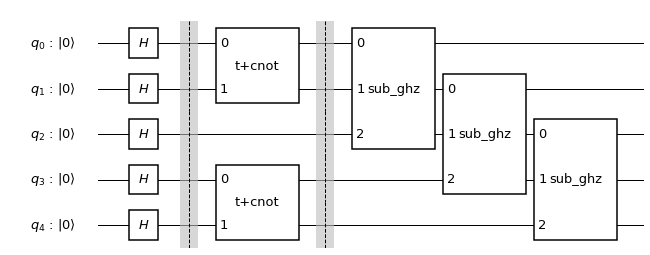

In [32]:
# Build a sub-circuit
# sub_ghz(n,c,t) creates a quantum circuit for creating an n-qubit GHZ state.
# n is the total number of qubits, c is an index for a control qubit, t is a vector of indices for target qubits.
def sub_ghz(n,c,t):
    sub_q = QuantumRegister(n)
    sub_circ = QuantumCircuit(sub_q, name='sub_ghz')
    sub_circ.h(c)
    for i in t:
        sub_circ.cx(c,i)
    return sub_circ

# Create a sub-circuit for 3-qubit GHZ state prep.
sub_ghz3 = sub_ghz(3,0,[1,2])
sub_inst3 = sub_ghz3.to_instruction()

# Create a sub-circuit consisting of T gate and cnot.
sub_tcnot = QuantumCircuit(QuantumRegister(2),name='t+cnot')
sub_tcnot.t(0)
sub_tcnot.cx(0,1)

q = QuantumRegister(5, 'q')
circ = QuantumCircuit(q)

# Now create a quantum circuit using sub-circuits.
# Apply Hadamard on all gates.
for i in range(5):
    circ.h(i)
#
circ.barrier()
# Appy 2-qubit GHZ preparation on qubits 0 and 1, and on qubits 3 and 4.
circ.append(sub_tcnot, [q[0],q[1]])
circ.append(sub_tcnot, [q[3], q[4]])
#    
circ.barrier()
# Apply 3-qubit GHZ preparation on all 3 neighbouring qubits.
for i in range(3):
    circ.append(sub_inst3, [q[i], q[i+1],q[i+2]])
circ.draw(output='mpl')

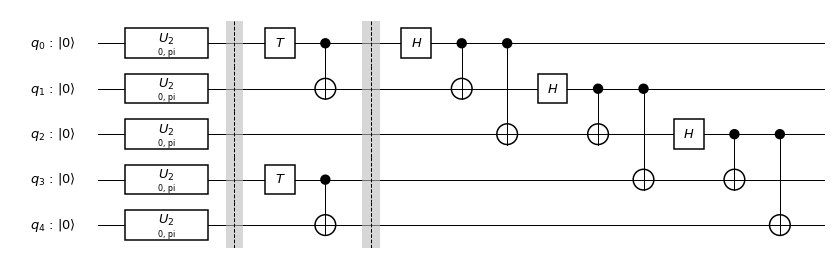

In [33]:
# We can also decompose the circuit that is constructed using sub-circuits.
circ.decompose().draw(output='mpl')

## Parameterized Circuits

* Can be very useful for building __variational quantum circuits__

![vqa1](img/vqa1.png)
![vqa2](img/vqa2.png)

In [2]:
from qiskit.circuit import Parameter

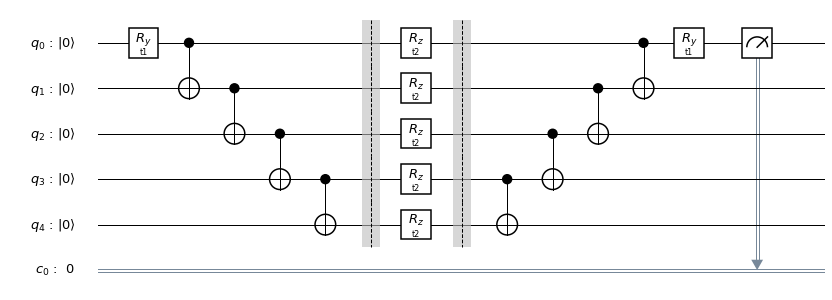

In [22]:
# Define two parameters, t1 and t2
theta1 = Parameter('t1')
theta2 = Parameter('t2')

# Build a 5-qubit circuit
qc = QuantumCircuit(5, 1)

# First parameter, t1, is used for a single qubit rotation of a controlled qubit
qc.ry(theta1,0)
for i in range(5-1):
    qc.cx(i, i+1)
qc.barrier()
# Second parameter, t2, is used here
qc.rz(theta2,range(5))
qc.barrier()

for i in reversed(range(5-1)):
    qc.cx(i, i+1)
    
qc.ry(theta1,0)
qc.measure(0, 0)

qc.draw(output='mpl')

## Binding parameters to values

* All circuit parameters must be bound before sending the circuit to a backend.
* The `bind_parameters` method accepts a dictionary mapping Parameters to values, and returns a new circuit with each parameter replaced by its corresponding value.
* `qiskit.execute` now accepts a `parameter_binds` keyword argument which, when specified as a list of dictionaries mapping Parameters to values, will bind and execute a circuit on the backend for every mapping dictionary in the list.

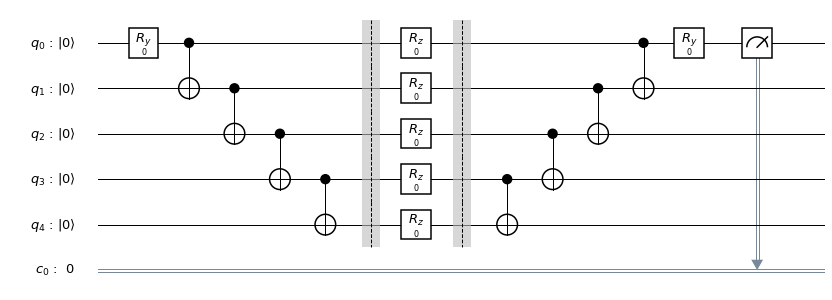

In [33]:
theta1_range = np.linspace(0, np.pi/2, 2)
theta2_range = np.linspace(0, 2 * np.pi, 64)

circuits = [qc.bind_parameters({theta1: theta_val1, theta2: theta_val2})
            for theta_val1 in theta1_range for theta_val2 in theta2_range ]

# Visualize several circuits to check that correct circuits are generated correctly.
circuits[0].draw(output='mpl')
# circuits[1].draw(output='mpl')
# circuits[64].draw(output='mpl')

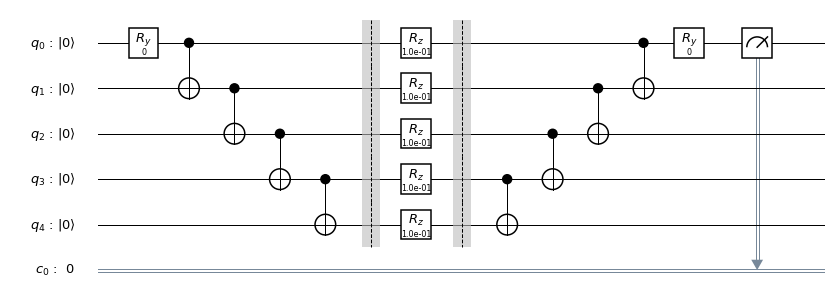

In [34]:
# theta1_range = np.linspace(0, np.pi/2, 2)
# theta2_range = np.linspace(0, 2 * np.pi, 64)

# circuits = [qc.bind_parameters({theta1: theta_val1, theta2: theta_val2})
#            for theta_val1 in theta1_range for theta_val2 in theta2_range ]

# Visualize several circuits to check that correct circuits are generated correctly.
# circuits[0].draw(output='mpl')
circuits[1].draw(output='mpl')
# circuits[64].draw(output='mpl')

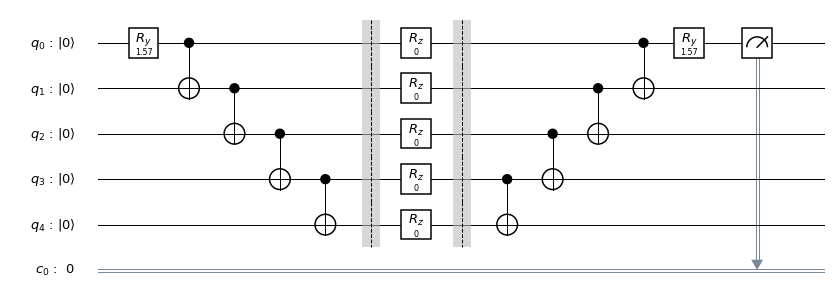

In [35]:
# theta1_range = np.linspace(0, np.pi/2, 2)
# theta2_range = np.linspace(0, 2 * np.pi, 64)

# circuits = [qc.bind_parameters({theta1: theta_val1, theta2: theta_val2})
#            for theta_val1 in theta1_range for theta_val2 in theta2_range ]

# Visualize several circuits to check that correct circuits are generated correctly.
# circuits[0].draw(output='mpl')
# circuits[1].draw(output='mpl')
circuits[64].draw(output='mpl')

In [671]:
# Execute multiple circuits
job = execute(qc, backend=Aer.get_backend('qasm_simulator'),
              parameter_binds=[{theta1: theta_val1, theta2: theta_val2} 
                               for theta_val1 in theta1_range for theta_val2 in theta2_range])

# Store all counts
counts = [job.result().get_counts(i) for i in range(len(job.result().results))]

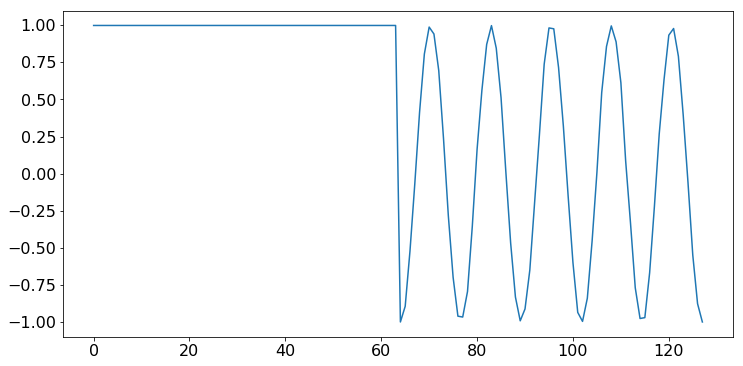

In [672]:
# Plot to visualize the result
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(range(len(theta1_range)*len(theta2_range)),
         list(map(lambda counts: (counts.get('0',0)-counts.get('1',1))/1024,counts)))
plt.show()

## Useful non-Unitary operations: Reset & Conditioning on classical bits

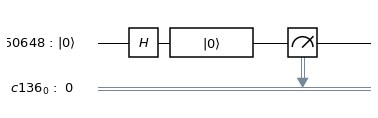

In [673]:
# Reset operation forces the target qubit to go to |0>
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)
qc.h(q)
qc.reset(q[0])
# qc.x(q)
qc.measure(q, c)
qc.draw(output='mpl')

In [674]:
# Test the result
job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots=1024)
job.result().get_counts(qc)

{'0': 1024}

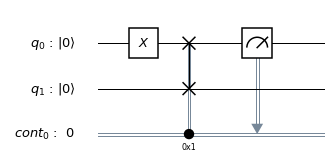

In [52]:
# Controlled qubit operation, controlled by classical bits
# This could be useful for designing a post-selection scheme of a quantum algorithm
q2 = QuantumRegister(2,'q')
cont = ClassicalRegister(1,'cont')
qc = QuantumCircuit(q2,cont)
qc.x(0)
qc.swap(q2[0],q2[1]).c_if(cont, 1)
qc.measure(q2[0],cont)
qc.draw(output='mpl')

In [53]:
job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots=1024)
job.result().get_counts(qc)

{'1': 1024}

## Exercise: Quantum Teleportation
<br>

![quantum teleportation](img/qt_circuit.png)

Reference circuit:


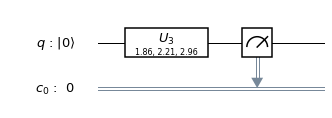

Quantum teleportation circuit:


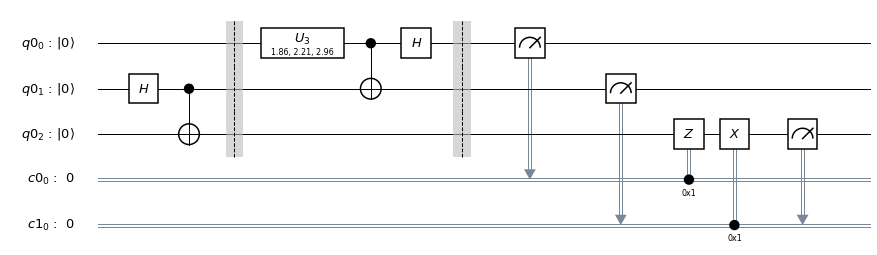

In [54]:
import random as r

qr = QuantumRegister(3)
cr1 = ClassicalRegister(1)
# Define a separate classical register for classically-controlled gate
cr2 = ClassicalRegister(1)
qtel = QuantumCircuit(qr,cr1,cr2)

# Make a reference circuit to compare
qref = QuantumCircuit(1,1)
# Prepare a 2-qubit bell state
qtel.h(1)
qtel.cx(1,2)
qtel.barrier()
# Prepare a random 1-qubit state
a1 = r.random()*np.pi
a2 = r.random()*np.pi
a3= r.random()*np.pi

qtel.u3(a1,a2,a3,0)

# Design a reference circuit for comparing to teleportation result
qref.u3(a1,a2,a3,0)
qref.measure(0,0)
print('Reference circuit:')
display(qref.draw(output='mpl'))

# Apply bell measurement on qubit 0 and 1
qtel.cx(0,1)
qtel.h(0)
qtel.barrier()
qtel.measure([0, 1],[0, 1])
qtel.z(2).c_if(cr1,1)
qtel.x(2).c_if(cr2,1)
qtel.measure(2,1)
print('Quantum teleportation circuit:')
display(qtel.draw(output='mpl'))

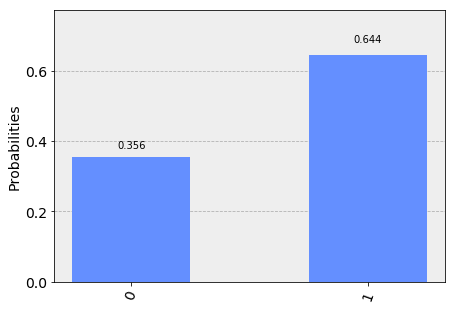

{'1 1': 3269, '1 0': 3271, '0 0': 1723, '0 1': 1737}
Prob. 1 from QT = 0.654
Prob. 0 from QT = 0.346


In [55]:
# n is the number of shots
n=10000
job_qtel = execute(qtel, backend_q, shots=n)
job_ref = execute(qref, backend_q, shots=n)

display(plot_histogram(job_ref.result().get_counts(qref)))
qtel_c = job_qtel.result().get_counts(qtel)
# Need some post-processing
print(qtel_c)
p1 = (qtel_c['1 0']+qtel_c['1 1'])/n
p0 = (qtel_c['0 0']+qtel_c['0 1'])/n

print('Prob. 1 from QT = %s' % p1)
print('Prob. 0 from QT = %s' % p0)

![part3](img/part3_v2.png)

### > Introducing Quantum Information Science Kit (qiskit)
### > Quantum Circuits I
### > Quantum Circuits II
### > Transpilation

## Limitations of Current Quantum Devices

- Noisy qubits: Total runtime must be much less than T1 and T2 (in the orde of 10-100 $\mu$s)
- Noisy gates

__$\rightarrow$ Circuit depth must be as shallow as possible__

__Let's look at the 20 qubit IBM quantum device:__
<div>
<img src="img/ibm_tokyo.png" width="100"/>
</div>

- Arbitrary gates must be decomposed into the native (basis) gate set

- Limited qubit connectivity for entangling gates.
    - In general, `swap` gates (~ 3 `cnot`) are used to complete the connectivity
<div>
<img src="img/swap_to_cnot.png" width="300"/>
</div>

__$\rightarrow$ Increases the circuit depth__

### Must rewrite circuits (transpile) for device topology, and to minimize depth 

### Transpiler is qiskit's circuit-rewriting framework

### Note: compiler would correspond to a larger translation from circuits to the level of machine pulses.

In [37]:
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager, Layout
from qiskit.tools.visualization import plot_gate_map

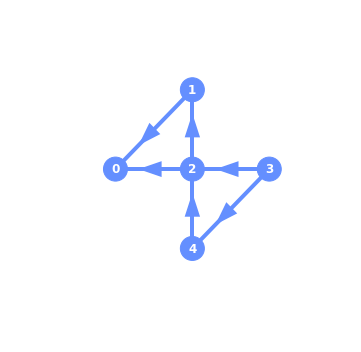

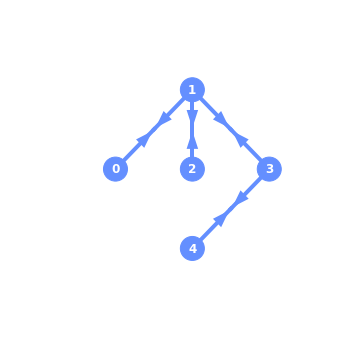

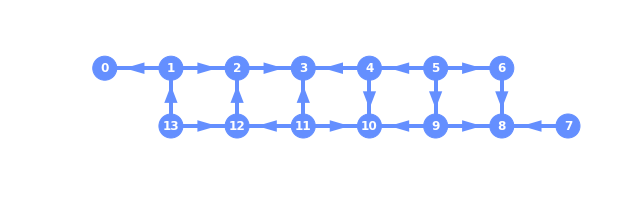

In [38]:
# Let's take a look at the layout of physical devices with the gate directions
display(plot_gate_map(backend_qx4,plot_directed=True))
display(plot_gate_map(backend_ou,plot_directed=True))
display(plot_gate_map(backend_mel,plot_directed=True))

## When `transpile` is called, a number of things occur by default:

1. Map desired circuit to a physical device layout
2. Unroll gates to the basis gate set
3. Measurement barrier
4. Swap mapping for qubit connectivity
5. Decompose swap
6. CNOT direction & CNOT cancellation
7. Single-qubit gate optimization

### Let's do a simple demo

Original circuit


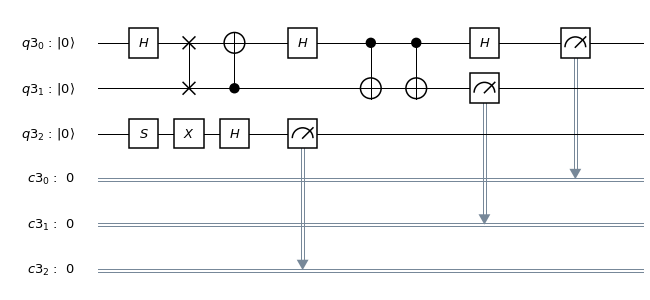

Transpiled circuit for ibmqx4


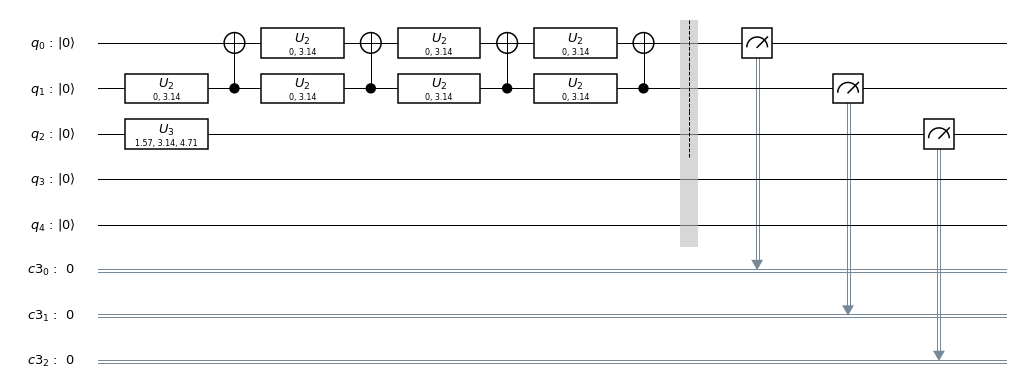

Transpiled circuit for ibmqx_Oursense


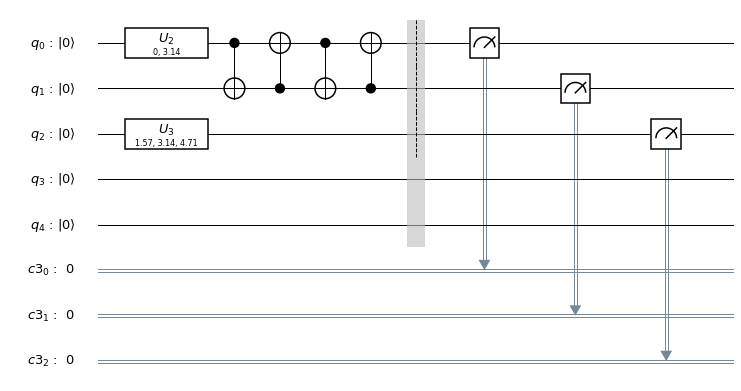

In [29]:
# Create a dummy circuit for default transpiler demonstration
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)
qc.h(0)
qc.swap(0,1)
qc.cx(1,0)
qc.s(2)
qc.x(2)
qc.h(2)
qc.measure(qr[2],cr[2])
qc.h(0)
qc.cx(0,1)
qc.cx(0,1)
qc.h(0)
qc.measure(qr[0],cr[0])
qc.measure(qr[1],cr[1])
print('Original circuit')
display(qc.draw(output='mpl'))

# Transpile the circuit to run on ibmqx4
qt_qx4 = transpile(qc,backend_qx4)
print('Transpiled circuit for ibmqx4')
display(qt_qx4.draw(output='mpl'))

# Transpile the circuit to run on ibmq_Ourense
qt_ou = transpile(qc,backend_ou)
print('Transpiled circuit for ibmqx_Oursense')
display(qt_ou.draw(output='mpl'))

## Pick the right physical qubits

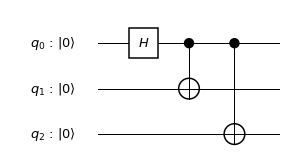

In [696]:
qr = QuantumRegister(3,'q')
qc = QuantumCircuit(qr)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.draw(output='mpl')

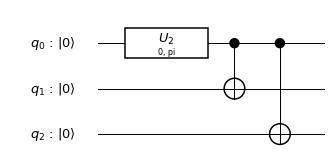

Number of operations = 3
Circuit depth = 3
Number of qubits = 3
Operations: {'u2': 1, 'cx': 2}
Number of unentangled subcircuits = 1


In [697]:
qc_t = transpile(qc, basis_gates=['u1','u2','u3','cx'])
# Display transpiled circuit
display(qc_t.draw(output='mpl'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qc_t.size())
# Circuit depth
print("Circuit depth = %s" % qc_t.depth())
# Number of qubits
print("Number of qubits = %s" % qc_t.width())
# Breakdown of operations by type
print("Operations: %s" % qc_t.count_ops())
# Number of unentangled subcircuits in this circuit.
# In principle, each subcircuit can be executed on a different quantum device.
print("Number of unentangled subcircuits = %s" % qc_t.num_tensor_factors())

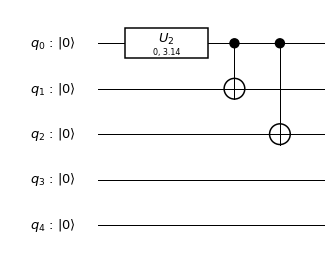

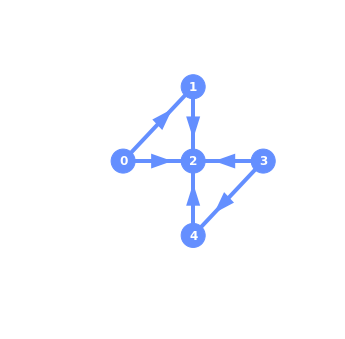

Number of operations = 3
Circuit depth = 3


In [701]:
# Map it onto 5 qubit backend ibmqx2
qc_qx2 = transpile(qc, backend_qx2, basis_gates=['u1','u2','u3','cx'])
display(qc_qx2.draw(output='mpl'))
display(plot_gate_map(backend_qx2,plot_directed=True))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qc_qx2.size())
# Circuit depth
print("Circuit depth = %s" % qc_qx2.depth())

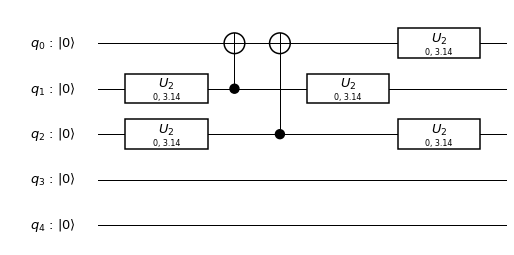

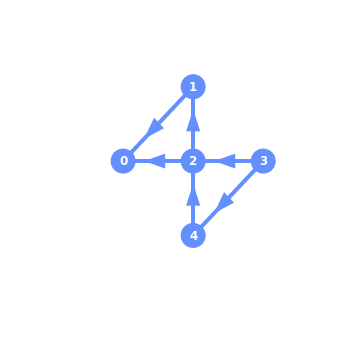

Number of operations = 7
Circuit depth = 4


In [702]:
# Map it onto 5 qubit backend ibmqx4
qc_qx4 = transpile(qc, backend_qx4,basis_gates=['u1','u2','u3','cx'])
display(qc_qx4.draw(output='mpl'))
display(plot_gate_map(backend_qx4,plot_directed=True))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qc_qx4.size())
# Circuit depth
print("Circuit depth = %s" % qc_qx4.depth())

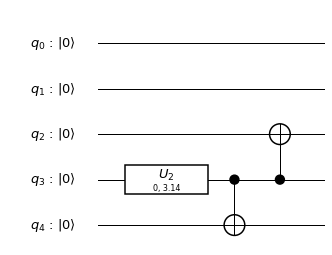

Number of operations = 3
Circuit depth = 3


In [703]:
# Customize the layout
layout = Layout({qr[0]: 3, qr[1]: 4, qr[2]: 2})
# Map it onto 5 qubit backend ibmqx4
qc_qx4_new = transpile(qc, backend_qx4,initial_layout=layout,basis_gates=['u1','u2','u3','cx'])
display(qc_qx4_new.draw(output='mpl'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qc_qx4_new.size())
# Circuit depth
print("Circuit depth = %s" % qc_qx4_new.depth())

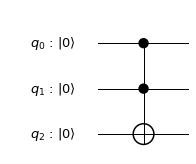

In [785]:
# Test transpilation with Toffoli gate
qr = QuantumRegister(3,'q')
qccx = QuantumCircuit(qr)
qccx.ccx(0,1,2)
qccx.draw(output='mpl')

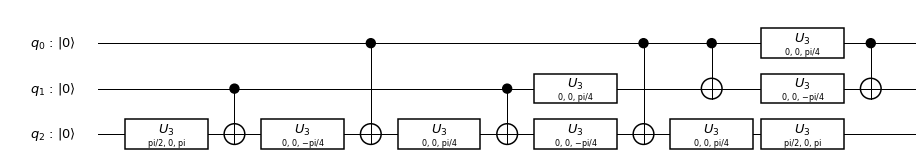

Number of operations = 15
Circuit depth = 11
Number of qubits = 3
Operations: {'u3': 9, 'cx': 6}
Number of unentangled subcircuits = 1


In [786]:
qccx_t = transpile(qccx, basis_gates=['u3','cx'])
# Display transpiled circuit
display(qccx_t.draw(output='mpl'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qccx_t.size())
# Circuit depth
print("Circuit depth = %s" % qccx_t.depth())
# Number of qubits
print("Number of qubits = %s" % qccx_t.width())
# Breakdown of operations by type
print("Operations: %s" % qccx_t.count_ops())
# Number of unentangled subcircuits in this circuit.
# In principle, each subcircuit can be executed on a different quantum device.
print("Number of unentangled subcircuits = %s" % qccx_t.num_tensor_factors())

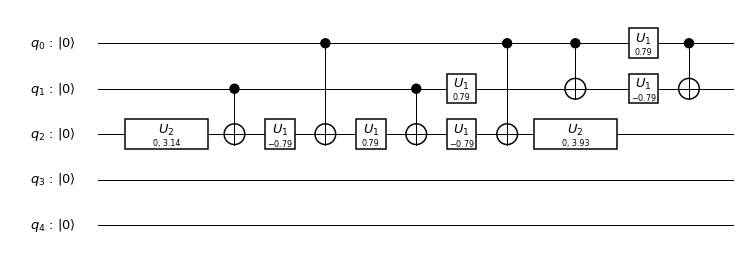

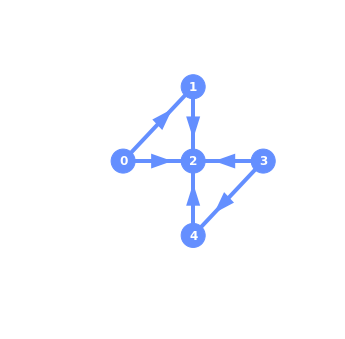

Number of operations = 14
Circuit depth = 11
Number of cx operations = 6


In [793]:
# Map it onto 5 qubit backend ibmqx2
qccx_qx2 = transpile(qccx, backend_qx2)
display(qccx_qx2.draw(output='mpl'))
display(plot_gate_map(backend_qx2,plot_directed=True))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qccx_qx2.size())
# Circuit depth
print("Circuit depth = %s" % qccx_qx2.depth())
# Number of cx gates
print("Number of cx operations = %s" % qccx_qx2.count_ops()['cx'])

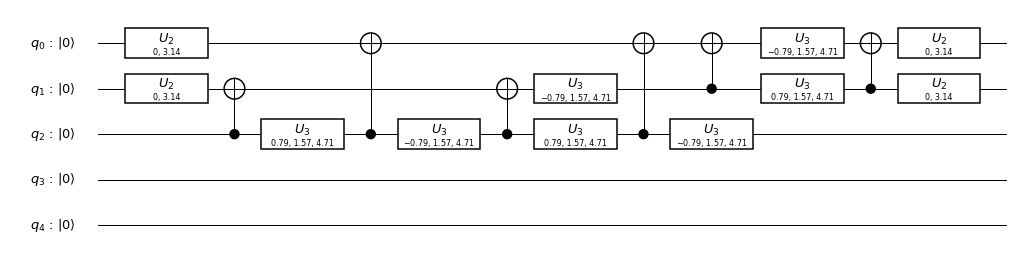

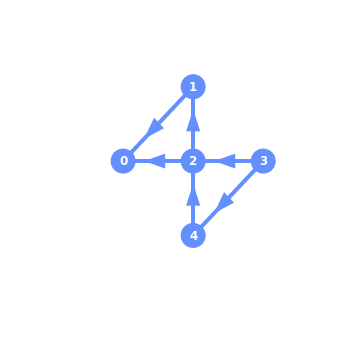

Number of operations = 17
Circuit depth = 12
Number of cx operations = 6


In [816]:
# Map it onto 5 qubit backend ibmqx4
qccx_qx4 = transpile(qccx, backend_qx4)
display(qccx_qx4.draw(output='mpl'))
display(plot_gate_map(backend_qx4,plot_directed=True))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qccx_qx4.size())
# Circuit depth
print("Circuit depth = %s" % qccx_qx4.depth())
# Number of cx gates
print("Number of cx operations = %s" % qccx_qx4.count_ops()['cx'])

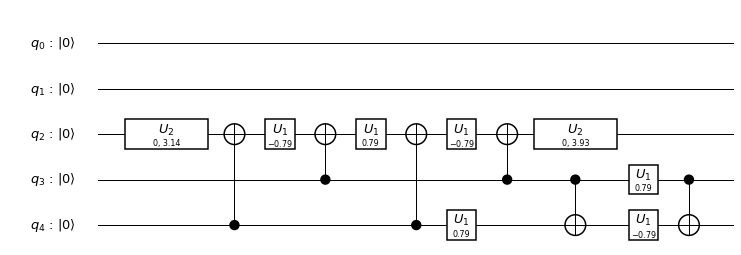

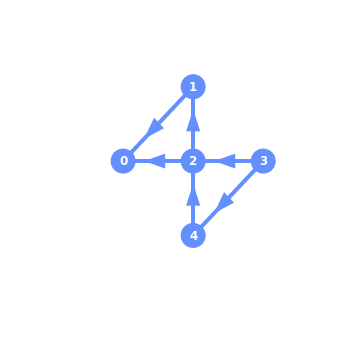

Number of operations = 14
Circuit depth = 11
Number of cx operations = 6


In [818]:
# Customize the layout
layout = Layout({qr[0]: 3, qr[1]: 4, qr[2]: 2})
# Map it onto 5 qubit backend ibmqx4
qccx_qx4_new = transpile(qccx, backend_qx4,initial_layout=layout)
display(qccx_qx4_new.draw(output='mpl'))
display(plot_gate_map(backend_qx4,plot_directed=True))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qccx_qx4_new.size())
# Circuit depth
print("Circuit depth = %s" % qccx_qx4_new.depth())
# Number of cx gates
print("Number of cx operations = %s" % qccx_qx4.count_ops()['cx'])

In [709]:
# The device information such as gate error and T1 and T2 also should be considered
# when customizing the layout.
backend_monitor(backend_qx2)

ibmqx2
Configuration
-------------
    n_qubits: 5
    operational: False
    status_msg: maintenance
    pending_jobs: 30
    backend_version: 1.3.0
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    max_shots: 8192
    max_experiments: 75
    allow_q_circuit: False
    credits_required: True
    online_date: 2018-11-06T05:00:00+00:00
    description: 5 qubit device
    sample_name: sparrow
    coupling_map: [[0, 1], [0, 2], [1, 2], [3, 2], [3, 4], [4, 2]]
    n_registers: 1
    memory: True
    open_pulse: False
    backend_name: ibmqx2
    url: None
    conditional: False
    allow_q_object: True

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 5.28631 GHz / 44.79331 µs / 52.31846 µs / 0.0 / 0.0049 / 0.00979 / 0.0335
    Q1 / 5.23785 GHz / 59.79924 µs / 56.88999 µs / 0.0 / 0.00206 / 0.00412 / 0.02475
    Q2 / 5.03027 GHz / 70.67637 µs / 60.6

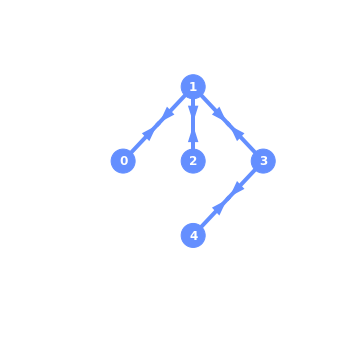

In [777]:
display(plot_gate_map(backend_ou,plot_directed=True))

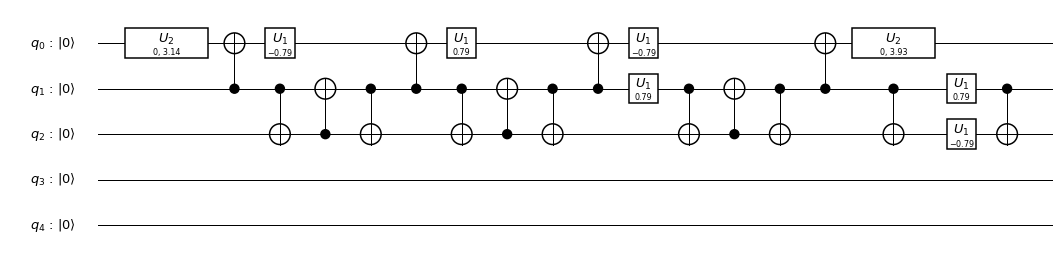

Number of operations = 23
Circuit depth = 18
Number of cx operations = 15


In [822]:
# Customize the layout IBMQ Ourense
layout_ou = Layout({qr[0]: 2, qr[1]: 3, qr[2]: 1})
# Map it onto 5 qubit backend ibmqx4
qccx_ou = transpile(qccx, backend_ou,initial_layout=layout_ou)
display(qccx_ou.draw(output='mpl'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % qccx_ou.size())
# Circuit depth
print("Circuit depth = %s" % qccx_ou.depth())
# Number of cx gates
print("Number of cx operations = %s" % qccx_ou.count_ops()['cx'])

## Minimize `Swap`

### Strategy: Find the best circuit stochastically

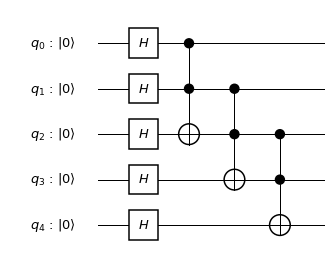

Number of operations = 8
Operation counts = {'h': 5, 'ccx': 3}
Circuit depth = 4


In [747]:
# Apply Toffoli among 5 qubits
qr = QuantumRegister(5,'q')
toff = QuantumCircuit(qr)

for i in range(5):
    toff.h(i)

toff.ccx(0,1,2)
toff.ccx(1,2,3)
toff.ccx(2,3,4)
    
display(toff.draw(output='mpl'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % toff.size())
# Count different types of operations
print("Operation counts = %s" % toff.count_ops())
# Circuit depth
print("Circuit depth = %s" % toff.depth())

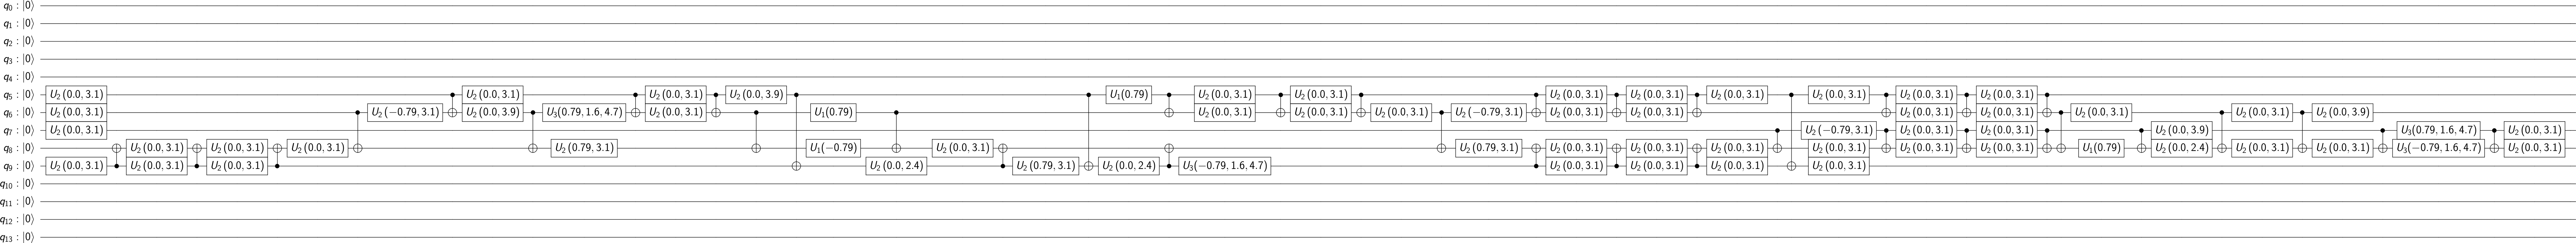

Number of operations = 105
Operation counts = {'u2': 59, 'cx': 38, 'u3': 4, 'u1': 4}
Circuit depth = 57


In [752]:
toff_t = transpile(toff, backend_mel)
display(toff_t.draw(output='latex'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % toff_t.size())
# Count different types of operations
print("Operation counts = %s" % toff_t.count_ops())
# Circuit depth
print("Circuit depth = %s" % toff_t.depth())

In [751]:
# Transpile many times (100 times in this example) and pick the best one
tcircs0 = transpile([toff]*100, backend_mel,optimization_level=0)
tcircs1 = transpile([toff]*100, backend_mel,optimization_level=1)
tcircs2 = transpile([toff]*100, backend_mel,optimization_level=2)
tcircs3 = transpile([toff]*100, backend_mel,optimization_level=3)

In [1]:
num_cx0 = [c.count_ops()['cx'] for c in tcircs0]
num_cx1 = [c.count_ops()['cx'] for c in tcircs1]
num_cx2 = [c.count_ops()['cx'] for c in tcircs2]
num_cx3 = [c.count_ops()['cx'] for c in tcircs3]

num_tot0 = [c.size() for c in tcircs0]
num_tot1 = [c.size() for c in tcircs1]
num_tot2 = [c.size() for c in tcircs2]
num_tot3 = [c.size() for c in tcircs3]

num_depth0 = [c.depth() for c in tcircs0]
num_depth1 = [c.depth() for c in tcircs1]
num_depth2 = [c.depth() for c in tcircs2]
num_depth3 = [c.depth() for c in tcircs3]

plt.rcParams.update({'font.size': 16})

# Plot the number of CNOT gates
plt.figure(figsize=(12,6))
plt.plot(range(len(num_cx0)),num_cx0,'r',label='level 0')
plt.plot(range(len(num_cx1)),num_cx1,'b',label='level 1')
plt.plot(range(len(num_cx2)),num_cx2,'g',label='level 2')
plt.plot(range(len(num_cx3)),num_cx3,'k',label='level 3')
plt.legend(loc='upper left')
plt.xlabel('Random trial')
plt.ylabel('# of cx gates')
plt.show()

# Plot total number of gates
plt.figure(figsize=(12,6))
plt.plot(range(len(num_cx0)),num_tot0,'r',label='level 0')
plt.plot(range(len(num_cx1)),num_tot1,'b',label='level 1')
plt.plot(range(len(num_cx2)),num_tot2,'g',label='level 2')
plt.plot(range(len(num_cx3)),num_tot3,'k',label='level 3')
plt.legend(loc='upper left')
plt.xlabel('Random trial')
plt.ylabel('# of total gates')
plt.show()

# Plot the number of CNOT gates
plt.figure(figsize=(12,6))
plt.plot(range(len(num_cx0)),num_depth0,'r',label='level 0')
plt.plot(range(len(num_cx1)),num_depth1,'b',label='level 1')
plt.plot(range(len(num_cx2)),num_depth2,'g',label='level 2')
plt.plot(range(len(num_cx3)),num_depth3,'k',label='level 3')
plt.legend(loc='upper left')
plt.xlabel('Random trial')
plt.ylabel('Circuit depth')
plt.show()

print('Opt0: Minimum # of cx gates = %s' % min(num_cx0))
print('Opt0: The best circuit is the circut %s' % num_cx0.index(min(num_cx0)))

print('Opt1: Minimum # of cx gates = %s' % min(num_cx1))
print('Opt1: The best circuit is the circut %s' % num_cx1.index(min(num_cx1)))

print('Opt2: Minimum # of cx gates = %s' % min(num_cx2))
print('Opt2: The best circuit is the circut %s' % num_cx2.index(min(num_cx2)))

print('Opt3: Minimum # of cx gates = %s' % min(num_cx3))
print('Opt3: The best circuit is the circut %s' % num_cx3.index(min(num_cx3)))

NameError: name 'tcircs0' is not defined

## Another example: Create many-qubit entangled state

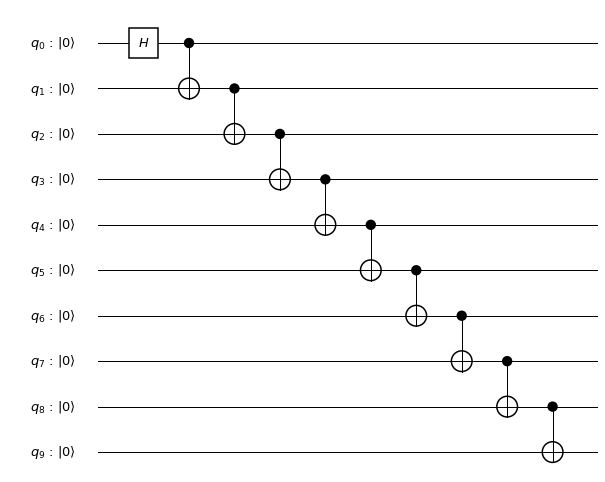

Number of operations = 10
Operation counts = {'h': 1, 'cx': 9}
Circuit depth = 10


In [754]:
# Create a 10-qubit GHZ state
qr = QuantumRegister(10,'q')
ghz = QuantumCircuit(qr)
ghz.h(0)
for i in range(9):
    ghz.cx(i,i+1)

display(ghz.draw(output='mpl'))

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % ghz.size())
# Count different types of operations
print("Operation counts = %s" % ghz.count_ops())
# Circuit depth
print("Circuit depth = %s" % ghz.depth())

In [757]:
ghz_t = transpile(ghz, backend_mel)
ghz_t.draw(output='latex')

# Print out some circuit properties
# Total nunmber of operations
print("Number of operations = %s" % ghz_t.size())
# Count different types of operations
print("Operation counts = %s" % ghz_t.count_ops())
# Circuit depth
print("Circuit depth = %s" % ghz_t.depth())

Number of operations = 43
Operation counts = {'u2': 27, 'cx': 16}
Circuit depth = 22


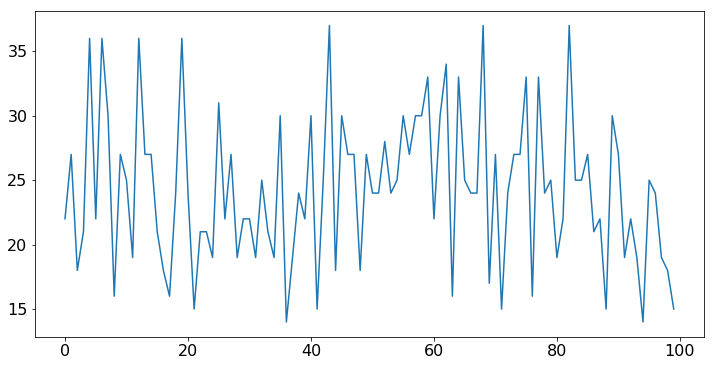

Minimum # of cx gates = 14
The best circuit is the circut 36


In [758]:
# Transpile 100 times and pick the best one
circs = transpile([ghz]*100, backend_mel)
num_cx = [c.count_ops()['cx'] for c in circs]
# Plot the number of CNOT gates
plt.figure(figsize=(12,6))
plt.plot(range(len(num_cx)),num_cx)
plt.show()
print('Minimum # of cx gates = %s' % min(num_cx))
print('The best circuit is the circut %s' % num_cx.index(min(num_cx)))

## Further Information

#### * Qiskit tutorial: https://nbviewer.jupyter.org/github/Qiskit/qiskit-tutorials/blob/master/qiskit/1_start_here.ipynb

#### * Qiskit online textbook: https://community.qiskit.org/textbook/

#### * Qiskit documentation: https://qiskit.org/documentation/

#### * Qiskit GitHub: https://github.com/Qiskit

# Thank you!